In [23]:
import os

os.path.exists('thinkdsp.py');

In [25]:
os.path.exists('28042__bcjordan__voicedownbew');

In [26]:
from thinkdsp import read_wave

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

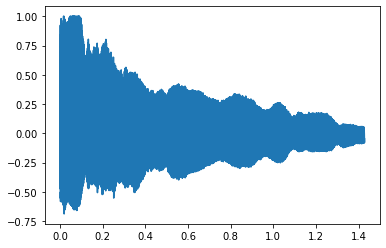

In [27]:
wave.plot()

In [28]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

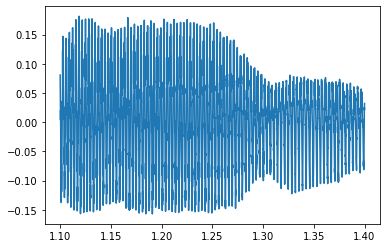

In [29]:
segment.plot()

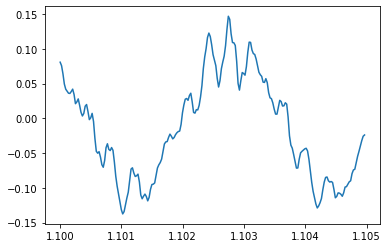

In [30]:
segment.segment(start=1.1, duration=0.005).plot()

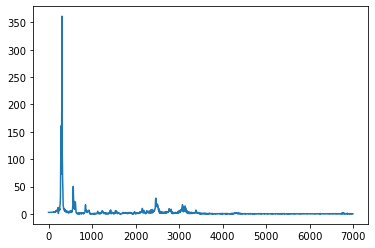

In [31]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

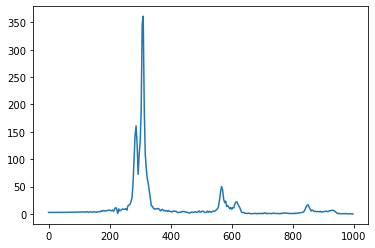

In [32]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [33]:
spectrum.peaks()[:30]

[(361.27911478485146, 310.0),
 (346.7407875919852, 306.6666666666667),
 (195.4870820965511, 313.33333333333337),
 (190.1550694368251, 303.33333333333337),
 (160.88842834368066, 286.6666666666667),
 (143.1612983176295, 283.33333333333337),
 (131.4692201574887, 300.0),
 (127.7789660970849, 290.0),
 (109.43388302800638, 316.6666666666667),
 (107.94172392364096, 296.6666666666667),
 (100.13109379794304, 280.0),
 (83.18136530351539, 320.0),
 (72.37260850210411, 293.33333333333337),
 (64.53963534553644, 323.33333333333337),
 (55.39290570456646, 276.6666666666667),
 (55.27021078038332, 326.6666666666667),
 (50.14416728603701, 566.6666666666667),
 (44.18212014032259, 570.0),
 (41.957853232313, 330.0),
 (40.99087714770975, 563.3333333333334),
 (29.37242099534125, 273.33333333333337),
 (28.784798480857816, 2466.666666666667),
 (28.542156495669435, 333.33333333333337),
 (27.62814850029139, 2463.3333333333335),
 (27.04216995914246, 573.3333333333334),
 (25.801494252738586, 2460.0),
 (25.6618115848

In [34]:
spectrum.low_pass(2000)

In [35]:
spectrum.make_wave().make_audio()

In [36]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [37]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

ValueError: Invalid number of FFT data points (0) specified.

Idk how to fix this mistake

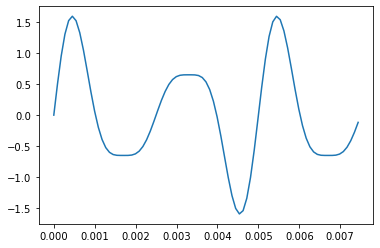

In [38]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))
signal.plot()

In [39]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

In [40]:
wave2.make_audio()

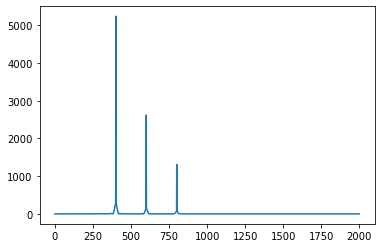

In [41]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

In [42]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

Exercise 3

In [43]:
wave3 = read_wave('28042__bcjordan__voicedownbew.wav')
wave3.normalize()
wave3.make_audio()

In [44]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [45]:
stretch(wave3, 0.5)
wave3.make_audio()

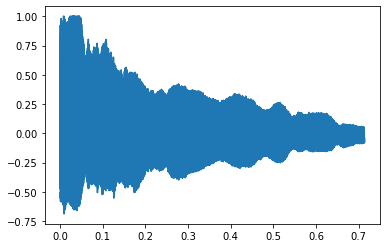

In [46]:
wave3.plot()